In [16]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import NaiveBayes, DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [17]:
spark = SparkSession.builder.appName("Classification").getOrCreate()
print('Spark Version: {}'.format(spark.version))

Spark Version: 3.4.1


In [18]:
#String indexing - Assigns a numerical value to each unique class present in the selected column
data = spark.read.csv("iris.csv", header=True, inferSchema=True)

# StringIndexer for the label column
label_indexer = StringIndexer(inputCol="species", outputCol="label").fit(data)
data = label_indexer.transform(data)

In [19]:
feature_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

In [20]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

# Naive Bayes

In [21]:
naive_bayes = NaiveBayes(featuresCol="features", labelCol="label", predictionCol="predicted_label")
nb_model = naive_bayes.fit(train_data)
nb_predictions = nb_model.transform(test_data)

In [22]:
nb_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="accuracy")
nb_accuracy = nb_evaluator.evaluate(nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

nb_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedPrecision")
nb_precision = nb_evaluator.evaluate(nb_predictions)
print(f"Naive Bayes Precision: {nb_precision}")

nb_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedRecall")
nb_recall = nb_evaluator.evaluate(nb_predictions)
print(f"Naive Bayes Recall: {nb_recall}")

nb_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="f1")
nb_fmeasure = nb_evaluator.evaluate(nb_predictions)
print(f"Naive Bayes Recall: {nb_fmeasure}")

Naive Bayes Accuracy: 0.9310344827586207
Naive Bayes Precision: 0.9310344827586207
Naive Bayes Recall: 0.9310344827586207
Naive Bayes Recall: 0.9310344827586207


# Decision Tree

In [23]:
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="label", predictionCol="predicted_label")
dt_model = dt_classifier.fit(train_data)
dt_predictions = dt_model.transform(test_data)

dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedPrecision")
dt_precision = dt_evaluator.evaluate(dt_predictions)
print(f"Decision Tree Precision: {dt_precision}")

dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedRecall")
dt_recall = dt_evaluator.evaluate(dt_predictions)
print(f"Decision Tree Recall: {dt_recall}")

dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="f1")
dt_fmeasure = dt_evaluator.evaluate(dt_predictions)
print(f"Decision Tree F-Measure: {dt_fmeasure}")

Decision Tree Accuracy: 0.9310344827586207
Decision Tree Precision: 0.9310344827586207
Decision Tree Recall: 0.9310344827586207
Decision Tree F-Measure: 0.9310344827586207


# Random Forest


In [24]:
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label", predictionCol="predicted_label")
rf_model = rf_classifier.fit(train_data)
rf_predictions = rf_model.transform(test_data)

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedPrecision")
rf_precision = rf_evaluator.evaluate(rf_predictions)
print(f"Random Forest Precision: {rf_precision}")

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="weightedRecall")
rf_recall = rf_evaluator.evaluate(rf_predictions)
print(f"Random Forest Recall: {rf_recall}")

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="predicted_label", metricName="f1")
rf_fmeasure = rf_evaluator.evaluate(rf_predictions)
print(f"Random Forest F-Measure: {rf_fmeasure}")

Random Forest Accuracy: 0.9655172413793104
Random Forest Precision: 0.9689655172413794
Random Forest Recall: 0.9655172413793104
Random Forest F-Measure: 0.9650984224486947


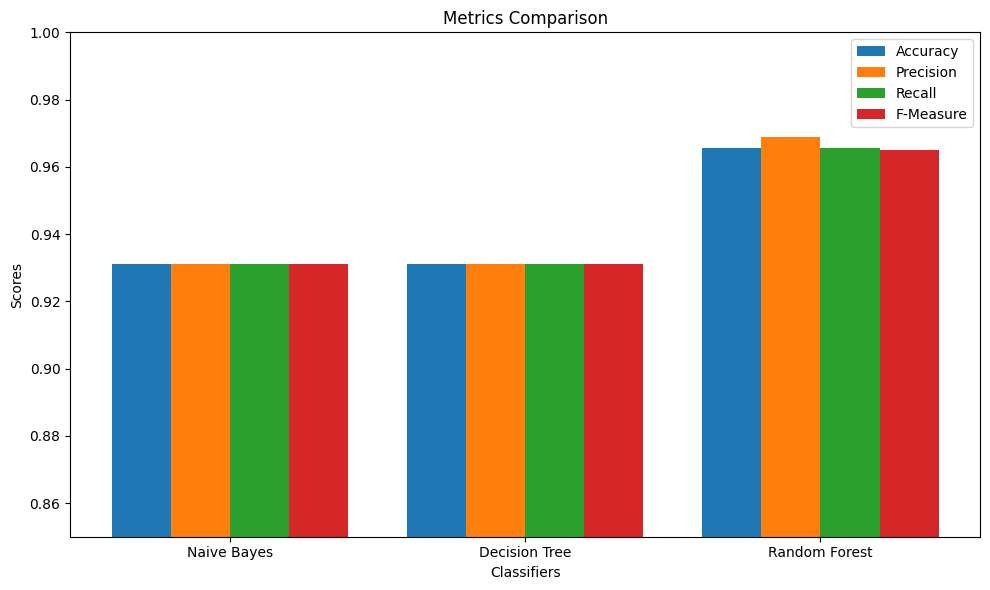

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with the actual metrics you've calculated
accuracy_values = [nb_accuracy, dt_accuracy, rf_accuracy]
precision_values = [nb_precision, dt_precision, rf_precision]
recall_values = [nb_recall, dt_recall, rf_recall]
fmeasure_values = [nb_fmeasure, dt_fmeasure, rf_fmeasure]

classifiers = ['Naive Bayes', 'Decision Tree', 'Random Forest']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(classifiers))

# Plot metrics
rects1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision')
rects3 = ax.bar(index + bar_width * 2, recall_values, bar_width, label='Recall')
rects4 = ax.bar(index + bar_width * 3, fmeasure_values, bar_width, label='F-Measure')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(classifiers)
plt.ylim(0.85, 1.0)
ax.legend()

plt.tight_layout()
plt.show()